# Curvy-CUSIPs: Swaps Basics

In [1]:
import sys
sys.path.append("../")

In [57]:
from CurvyCUSIPs.CurveDataFetcher import CurveDataFetcher
from CurvyCUSIPs.S490Swaps import S490Swaps
from CurvyCUSIPs.USTs import USTs
from CurvyCUSIPs.utils.dtcc_swaps_utils import tenor_to_years

from datetime import datetime
import QuantLib as ql
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay 
from pandas.tseries.holiday import USFederalHolidayCalendar
from typing import Dict, List

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.style.use('ggplot')
params = {'legend.fontsize': 'x-large',
        'figure.figsize': (18, 10),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import os
from dotenv import dotenv_values
env_path = os.path.join(os.getcwd(), "../.env")
config = dotenv_values(env_path)

import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
curve_data_fetcher = CurveDataFetcher(fred_api_key=config["FRED_API_KEY"])

In [10]:
sofr_ois = S490Swaps(s490_curve_db_path=r"..\db\nyclose_sofr_ois")
usts = USTs(
    cusip_set_db_path=r"..\db\ust_cusip_set",
    cusip_timeseries_db_path=r"..\db\ust_cusip_timeseries",
    ct_eod_db_path=r"..\db\ust_eod_ct_yields",
    curve_data_fetcher=curve_data_fetcher,
)

## SOFR OIS NY Close Curve:

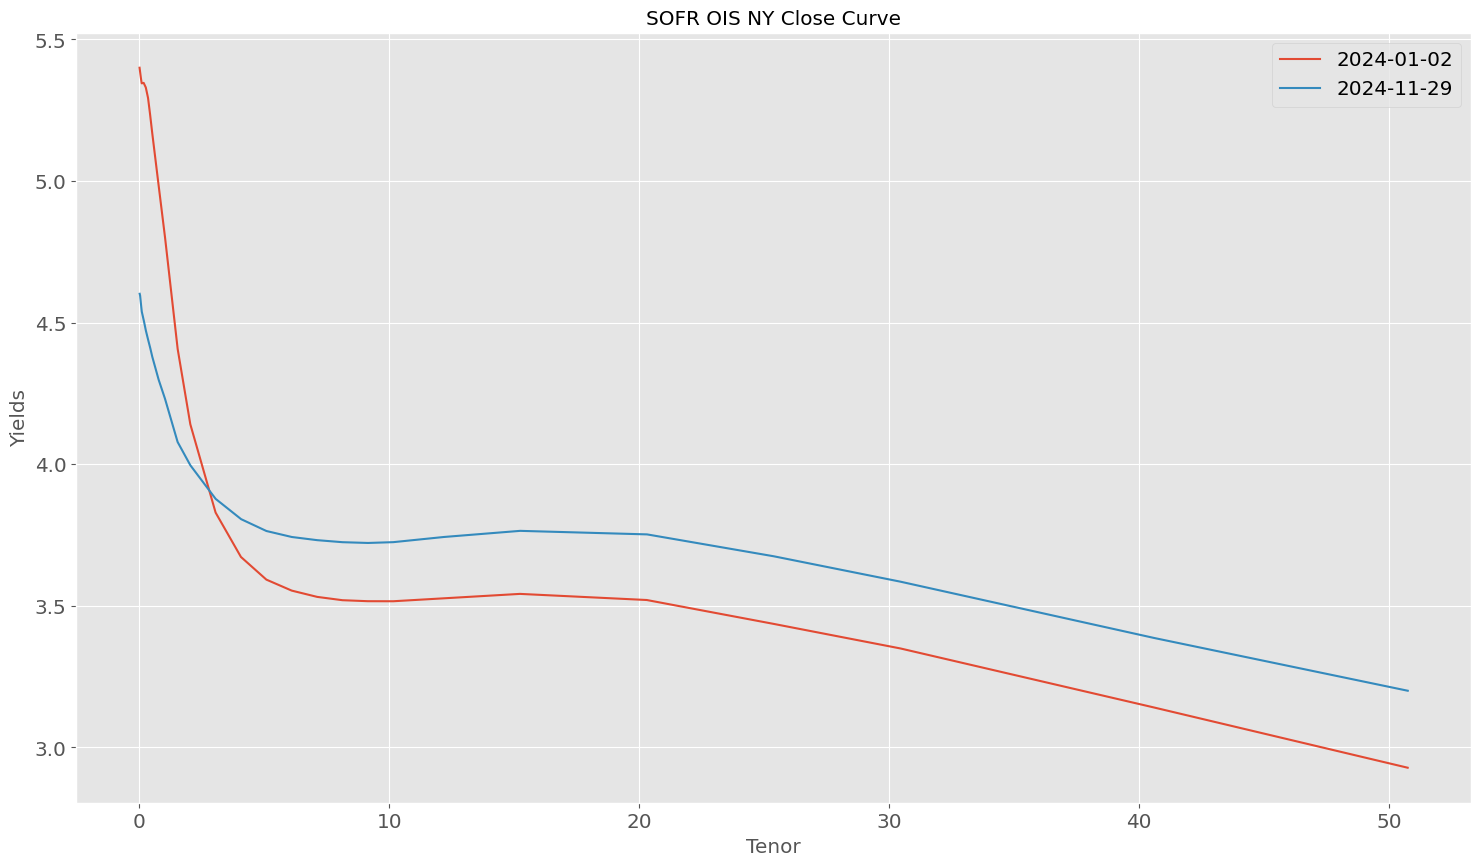

In [26]:
as_of_dates = [datetime(2024, 1, 2), datetime(2024, 11, 29)]

plt.figure()
for curr in as_of_dates:
    try:
        str_ts = str(int(curr.timestamp()))
        ohlc_df = pd.DataFrame(sofr_ois.s490_nyclose_db.get(str_ts)["ohlc"])
        ohlc_df["Expiry"] = pd.to_numeric(ohlc_df["Expiry"], errors="coerce")
        ohlc_df["Expiry"] = pd.to_datetime(ohlc_df["Expiry"], errors="coerce", unit="s")
        if len(as_of_dates) == 1:
            display(ohlc_df)
        plt.plot((ohlc_df["Expiry"] - curr).dt.days / 360, ohlc_df["Close"] * 100, label=f"{curr.date()}")
    except Exception as e:
        print(f"{curr} NOT IN DB", e)


plt.xlabel("Tenor")
plt.ylabel("Yields")
plt.title("SOFR OIS NY Close Curve")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()


In [37]:
start_date = datetime(2018, 4, 3) # first day of SOFR index 
end_date = datetime(2024, 12, 1)
sofr_ois_df = sofr_ois.s490_nyclose_term_structure_ts(start_date=start_date, end_date=end_date)
ct_df = usts.fetch_ct_yields(start_date=start_date, end_date=end_date) 

display(ct_df)
sofr_ois_df

,CT3M,CT6M,CT1,CT2,CT3,CT5,CT7,CT10,CT20,CT30
Date,,,,,,,,,,
2018-04-03,1.676613,1.877068,2.071824,2.282248,2.407672,2.600753,2.728741,2.786260,NaN,3.023851
2018-04-04,1.616072,1.856605,2.050879,2.282257,2.418747,2.607528,2.733726,2.793566,NaN,3.035073
2018-04-05,1.656302,1.866692,2.050763,2.298477,2.440933,2.641328,2.763572,2.830179,NaN,3.072183
2018-04-06,1.707012,1.877265,2.040007,2.266026,2.396611,2.580670,2.704032,2.768011,NaN,3.014242
2018-04-09,1.696850,1.887353,2.050295,2.282306,2.418840,2.600957,2.718939,2.782614,NaN,3.015837
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,4.477939,4.435174,4.394635,4.377849,4.316518,4.301327,4.345449,4.409881,4.707747,4.596384
2024-11-25,4.404584,4.398652,4.337351,4.275555,4.214558,4.194658,4.239662,4.304114,4.598057,4.482679
2024-11-26,4.509389,4.459824,4.385393,4.275668,4.214561,4.173371,4.208064,4.265185,4.567831,4.448571


,1D,1W,2W,3W,1M,2M,3M,4M,5M,6M,...,8Y,9Y,10Y,12Y,15Y,20Y,25Y,30Y,40Y,50Y
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-03,1.830000,1.807855,1.782310,1.757126,1.724100,1.726900,1.768700,1.806600,1.830100,1.852200,...,2.355500,2.361400,2.371500,2.378803,2.389800,2.393500,2.378300,2.340700,2.300500,2.266300
2018-04-04,1.740000,1.737645,1.734896,1.732152,1.728500,1.731100,1.775000,1.810600,1.834900,1.861200,...,2.385000,2.391800,2.403200,2.410185,2.420700,2.420900,2.403800,2.371300,2.330200,2.294900
2018-04-05,1.750000,1.745814,1.740934,1.736067,1.729600,1.732100,1.784000,1.820600,1.846000,1.871200,...,2.404100,2.413500,2.426100,2.435354,2.449300,2.452300,2.437300,2.402700,2.361900,2.325400
2018-04-06,1.750000,1.745670,1.740622,1.735588,1.728900,1.730800,1.780800,1.815100,1.837100,1.861100,...,2.340600,2.348300,2.360100,2.369870,2.384600,2.388700,2.375800,2.342200,2.301700,2.265400
2018-04-09,1.750000,1.745690,1.740666,1.735657,1.729000,1.730600,1.786100,1.823600,1.845700,1.871200,...,2.344700,2.350400,2.360700,2.369117,2.381800,2.385400,2.369300,2.339100,2.298700,2.262900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,4.610914,4.609831,4.603995,4.598167,4.590408,4.559349,4.528500,4.501778,4.475214,4.448806,...,3.914683,3.916080,3.920356,3.933897,3.951881,3.932391,3.852946,3.760683,3.564191,3.376875
2024-11-25,4.589838,4.589908,4.586545,4.583184,4.578707,4.550595,4.522655,4.493603,4.464739,4.436059,...,3.788845,3.786557,3.789050,3.803753,3.821785,3.803599,3.725164,3.636290,3.436412,3.251795
2024-11-26,4.580000,4.609523,4.596349,4.583212,4.565755,4.531655,4.497809,4.471935,4.446210,4.420633,...,3.835313,3.836139,3.840455,3.854354,3.870217,3.851515,3.771618,3.681399,3.481604,3.295433


## Levels:

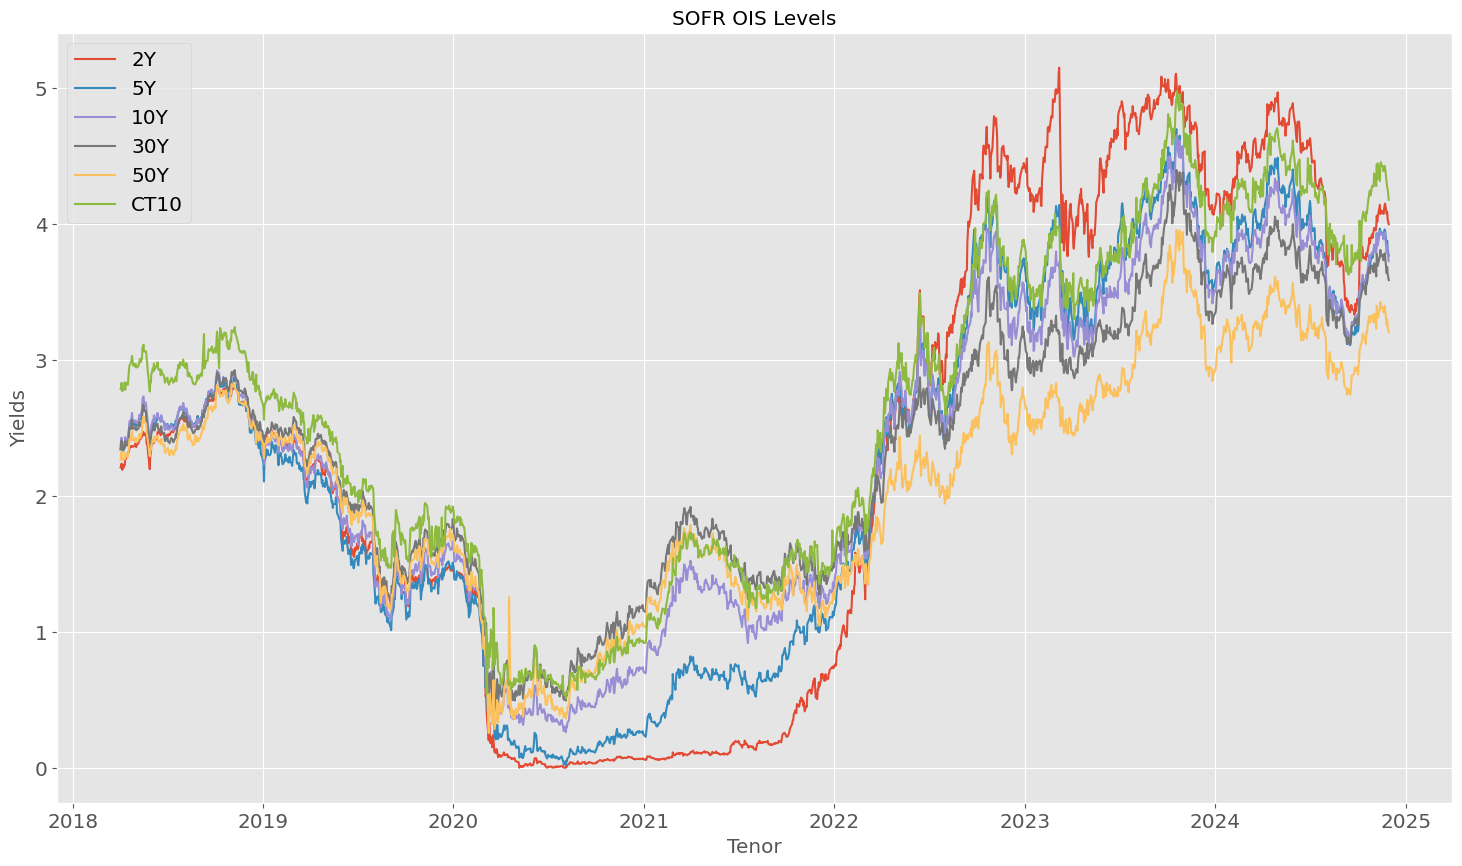

In [38]:
swap_tenors = ["2Y", "5Y", "10Y", "30Y", "50Y"]
ct_tenors = ["CT10"]

for tenor in swap_tenors:
    plt.plot(sofr_ois_df.index, sofr_ois_df[tenor], label=tenor)

for tenor in ct_tenors:    
    plt.plot(ct_df.index, ct_df[tenor], label=tenor)

plt.xlabel("Tenor")
plt.ylabel("Yields")
plt.title("SOFR OIS Levels")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

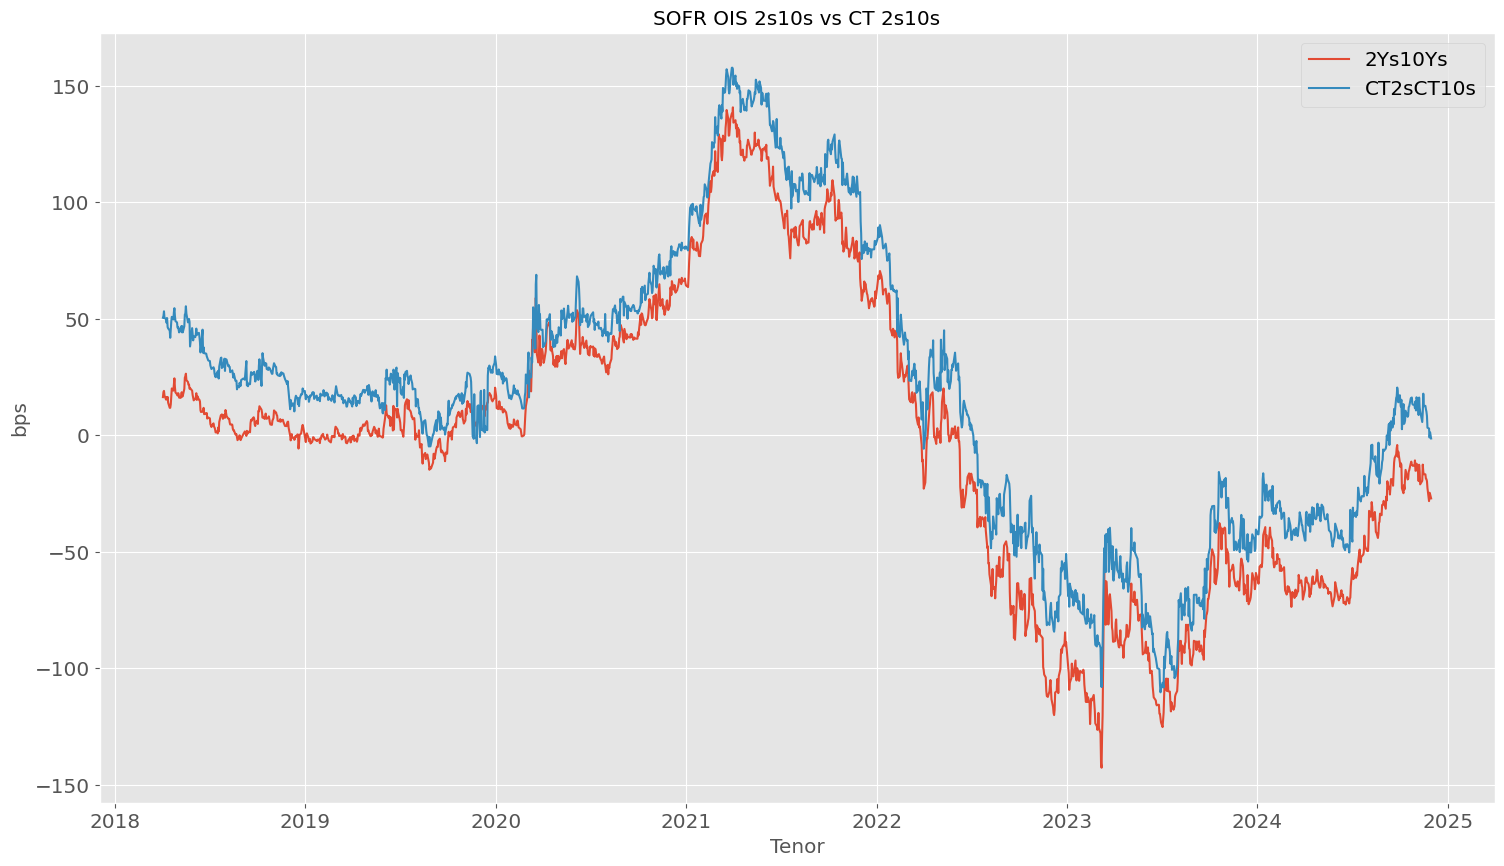

In [39]:
swap_curve_spreads = [("2Y", "10Y")]
ct_curve_spreads = [("CT2", "CT10")]

for spread in swap_curve_spreads:
    plt.plot(sofr_ois_df.index, (sofr_ois_df[spread[1]] - sofr_ois_df[spread[0]]) * 100, label=f"{spread[0]}s{spread[1]}s")

for spread in ct_curve_spreads:
    plt.plot(ct_df.index, (ct_df[spread[1]] - ct_df[spread[0]]) * 100, label=f"{spread[0]}s{spread[1]}s")

plt.xlabel("Tenor")
plt.ylabel("bps")
plt.title("SOFR OIS 2s10s vs CT 2s10s")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

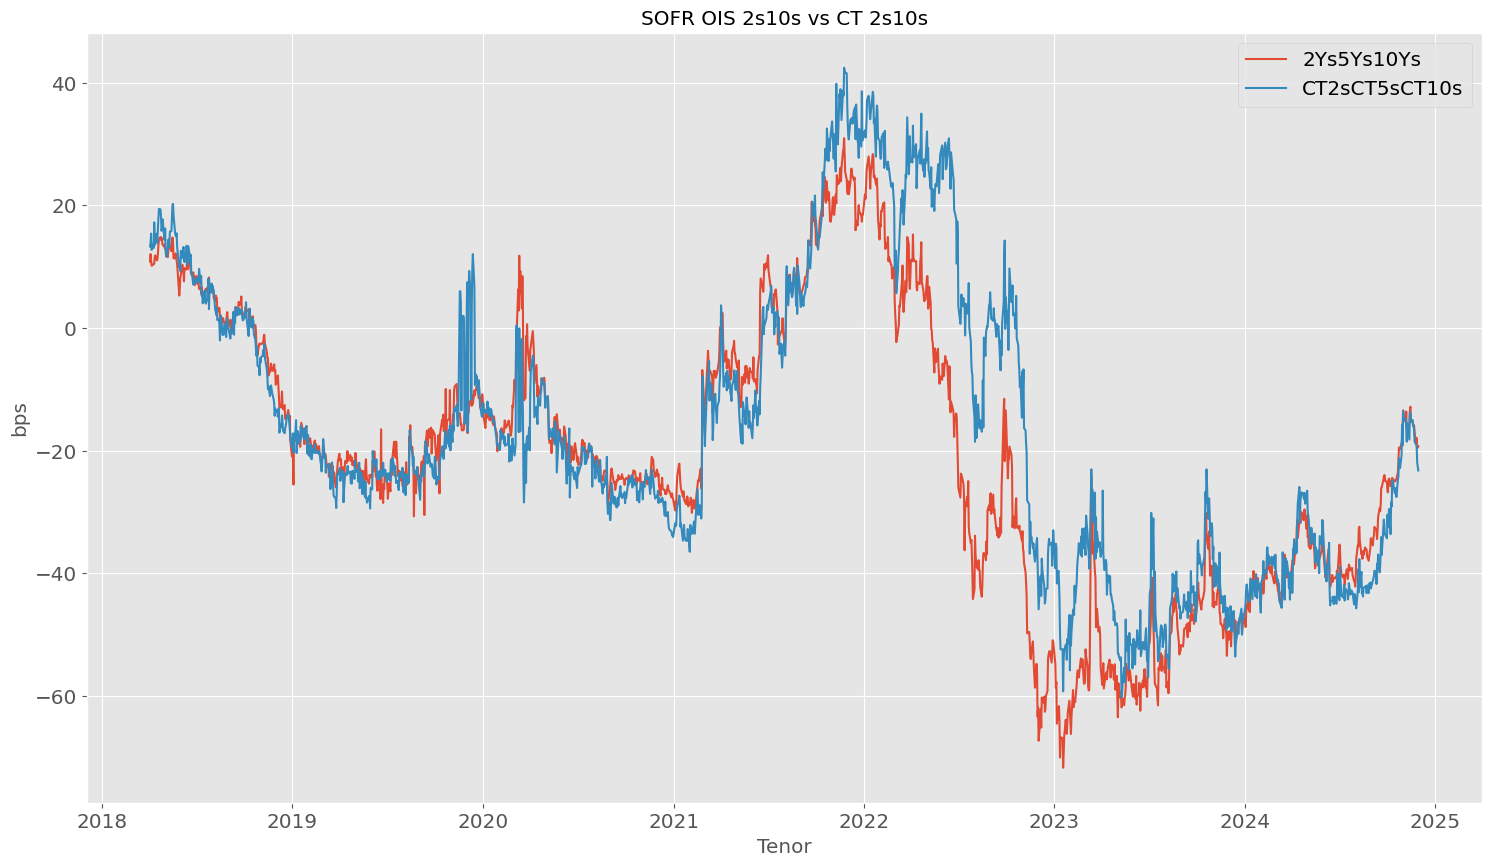

In [40]:
swap_curve_flies = [("2Y", "5Y", "10Y")]
ct_curve_flies = [("CT2", "CT5", "CT10")]

for fly in swap_curve_flies:
    plt.plot(
        sofr_ois_df.index,
        ((sofr_ois_df[fly[1]] - sofr_ois_df[fly[0]]) - (sofr_ois_df[fly[2]] - sofr_ois_df[fly[1]])) * 100,
        label=f"{fly[0]}s{fly[1]}s{fly[2]}s",
    )

for fly in ct_curve_flies:
    plt.plot(
        ct_df.index,
        ((ct_df[fly[1]] - ct_df[fly[0]]) - (ct_df[fly[2]] - ct_df[fly[1]])) * 100,
        label=f"{fly[0]}s{fly[1]}s{fly[2]}s",
    )

plt.xlabel("Tenor")
plt.ylabel("bps")
plt.title("SOFR OIS 2s10s vs CT 2s10s")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

## SOFR OIS Swap Spreads:

In [45]:
cmt_df = curve_data_fetcher.fred_data_fetcher.get_historical_cmt_yields(start_date=start_date, end_date=end_date)
swap_spread_cmt_df = sofr_ois.swap_spreads_term_structure(swaps_term_structure_ts_df=sofr_ois_df, cash_term_structure_ts_df=cmt_df, is_cmt=True)
display(swap_spread_cmt_df)

swap_spread_ct_df = sofr_ois.swap_spreads_term_structure(swaps_term_structure_ts_df=sofr_ois_df, cash_term_structure_ts_df=ct_df)
swap_spread_ct_df

Fetching from FRED...


,3M,6M,12M,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,
2018-04-03,4.870000,-2.780000,-8.380000,-7.180000,-11.490000,-25.600000,-37.320000,-41.850000,-50.650000,-67.930000
2018-04-04,9.500000,0.120000,-5.410000,-6.180000,-11.090000,-23.900000,-34.440000,-38.680000,-48.910000,-65.870000
2018-04-05,9.400000,-0.880000,-4.090000,-6.390000,-11.990000,-25.400000,-35.720000,-40.390000,-49.770000,-66.730000
2018-04-06,8.080000,0.110000,-5.730000,-7.980000,-12.790000,-25.400000,-35.910000,-40.990000,-50.130000,-66.780000
2018-04-09,5.610000,-1.880000,-6.420000,-8.180000,-14.090000,-26.400000,-37.360000,-41.930000,-50.460000,-68.090000
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,9.849957,10.880631,-8.877727,-22.239647,-26.791370,-35.111632,-43.231128,-48.964430,-73.760946,-83.931715
2024-11-25,10.265480,9.605912,-7.608329,-13.780187,-25.313710,-33.389011,-41.363951,-48.095046,-72.640122,-81.371001
2024-11-26,9.780906,10.063264,-7.206337,-12.234876,-22.877921,-29.557029,-40.048269,-45.954490,-70.848478,-79.860118


,3M,6M,12M,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,
2018-04-03,9.208713,-2.486812,-6.562415,-7.404807,-11.257185,-25.675319,-37.194104,-41.475974,NaN,-68.315137
2018-04-04,15.892752,0.459462,-3.497915,-6.405665,-10.964745,-23.652841,-34.812552,-39.036566,NaN,-66.377341
2018-04-05,12.769770,0.450797,-2.166267,-6.237666,-11.083270,-25.532808,-36.077183,-40.407949,NaN,-66.948305
2018-04-06,7.378841,-1.616526,-3.730668,-7.582588,-12.451129,-25.467039,-36.313244,-40.791080,NaN,-67.204158
2018-04-09,8.925037,-1.615333,-3.449478,-7.410583,-12.973997,-26.495695,-37.253889,-42.191438,NaN,-67.673688
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,5.056090,1.363217,-6.341238,-23.024572,-26.443169,-35.244335,-42.775994,-48.952489,-77.535654,-83.570114
2024-11-25,11.807114,3.740760,-4.343405,-20.335722,-25.769550,-35.854789,-44.330187,-51.506414,-79.445853,-84.638868
2024-11-26,-1.157970,-3.919095,-8.745657,-18.801713,-23.334070,-29.894131,-36.854695,-42.472976,-71.631576,-76.717228


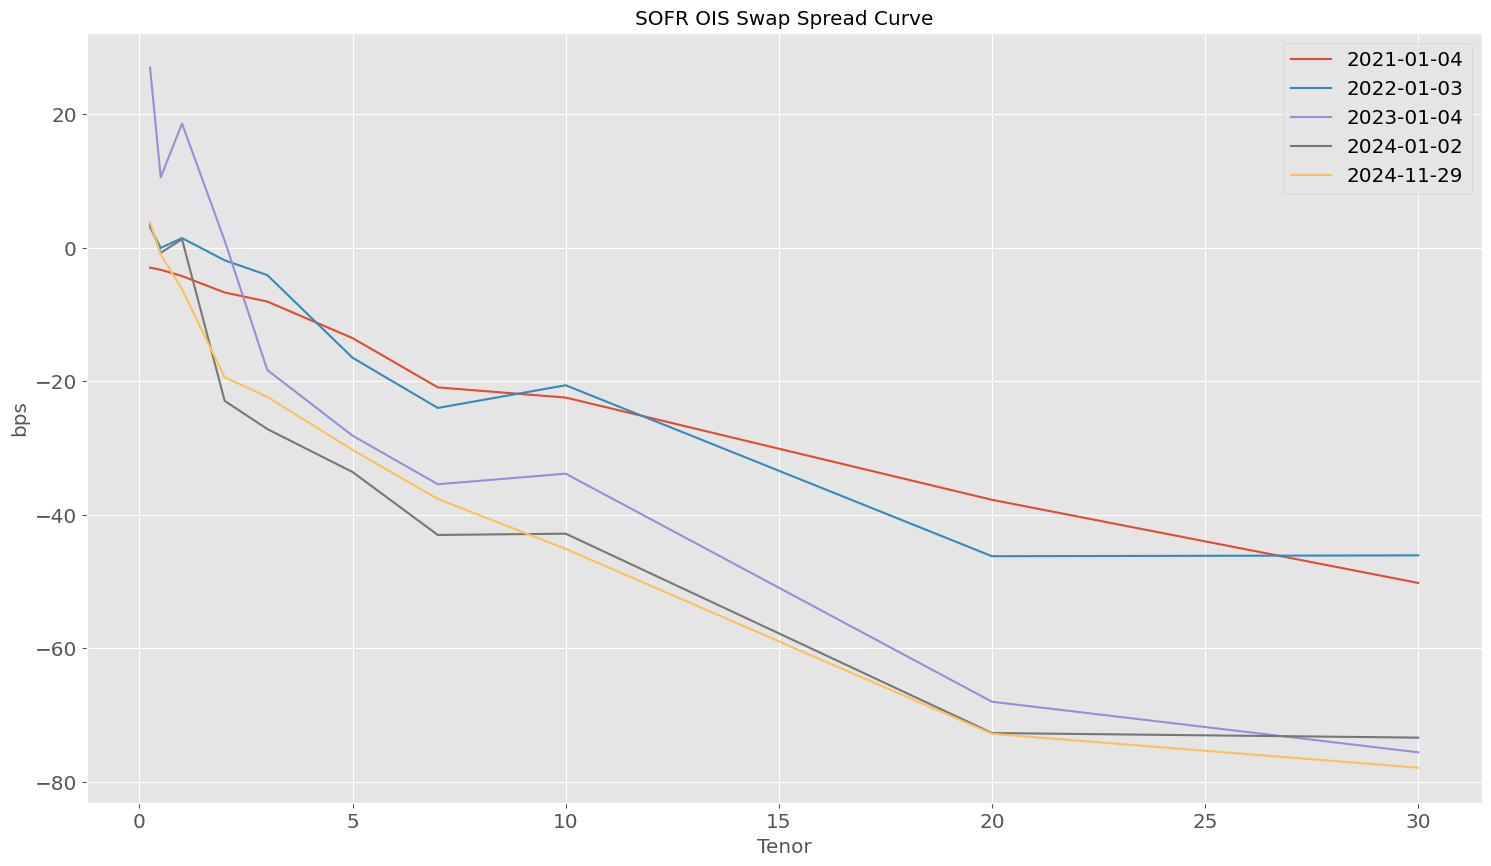

In [56]:
as_of_dates = [datetime(2021, 1, 4), datetime(2022, 1, 3), datetime(2023, 1, 4), datetime(2024, 1, 2), datetime(2024, 11, 29)]

for curr in as_of_dates:
    try:
        spreads_dict = swap_spread_ct_df[swap_spread_cmt_df.index == curr].to_dict("records")[0]
        plt.plot([tenor_to_years(tenor) for tenor in spreads_dict.keys()], list(spreads_dict.values()), label=f"{curr.date()}")
    except Exception as e:
        print(f"{curr} NOT IN DB", e)

plt.xlabel("Tenor")
plt.ylabel("bps")
plt.title("SOFR OIS Swap Spread Curve")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

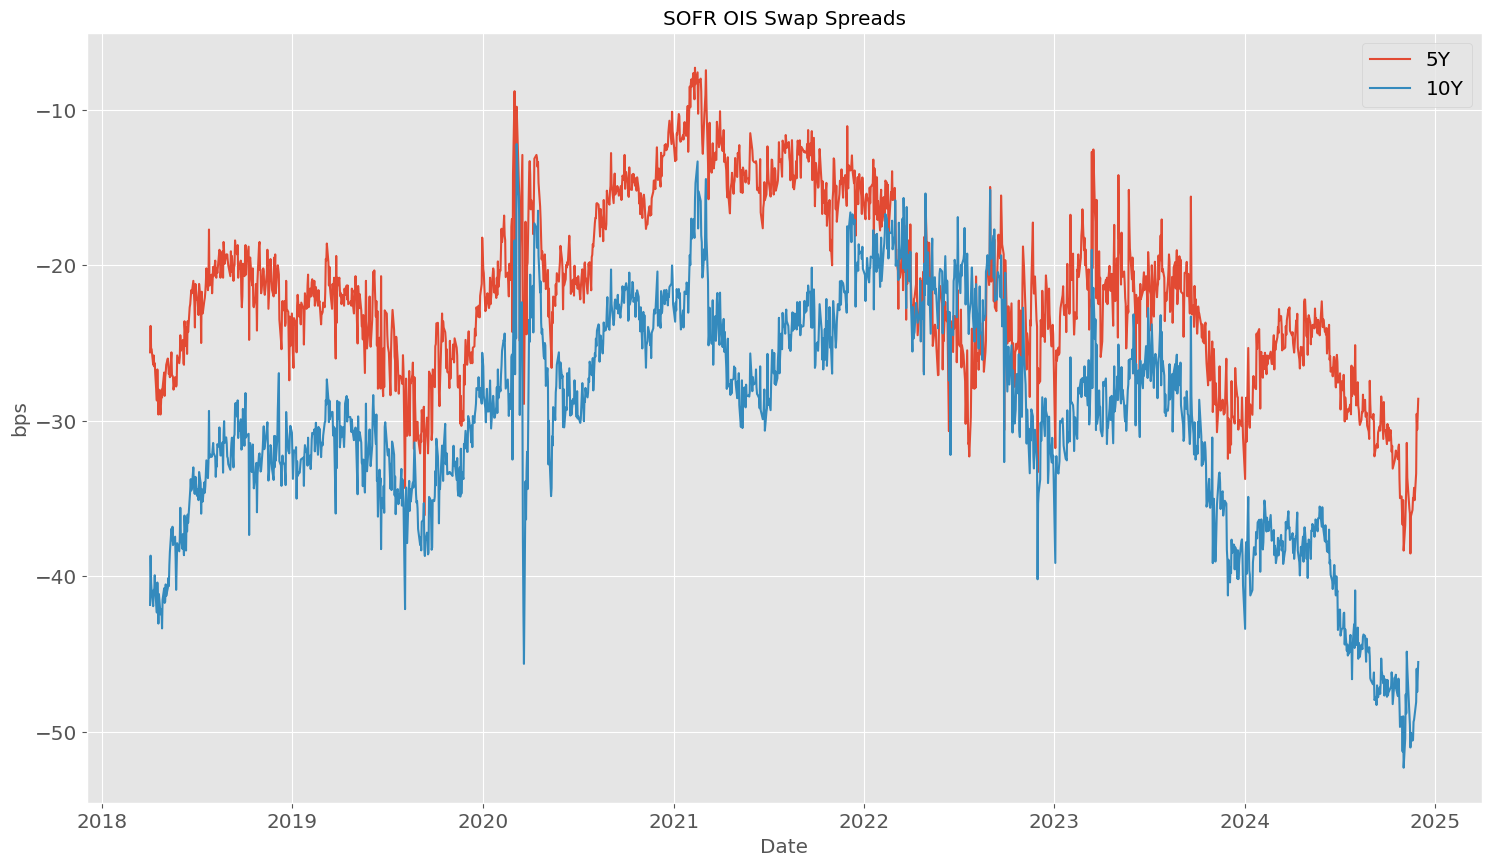

In [61]:
tenors = ["5Y", "10Y"]

for tenor in tenors:
    plt.plot(swap_spread_ct_df.index, swap_spread_cmt_df[tenor], label=f"{tenor}")

plt.xlabel("Date")
plt.ylabel("bps")
plt.title("SOFR OIS Swap Spreads")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

# SOFR OIS Forwards:

In [64]:
start_date = datetime(2024, 8, 1)
end_date = datetime(2024, 12, 1)

fwd_dict, ql_curves = sofr_ois.s490_nyclose_fwd_curve_matrices(
    start_date=start_date,
    end_date=end_date,
    ql_piecewise_method="logLinearDiscount",
    ql_compounding=ql.Simple,
)

In [65]:
fwd_dict[datetime(2024, 11, 29)]

,Tenor,Fixed Rate,1D Fwd,1W Fwd,1M Fwd,2M Fwd,3M Fwd,6M Fwd,12M Fwd,18M Fwd,2Y Fwd,3Y Fwd,5Y Fwd,10Y Fwd,15Y Fwd
0,1D,4.601776,4.898612,4.900694,4.613478,4.369191,4.389770,4.304202,4.144821,3.975754,3.982082,3.921165,3.948494,4.314740,4.866973
1,1W,4.595379,4.898612,4.900694,4.484450,4.319904,4.355699,4.272166,4.119974,3.962100,3.969083,3.912173,3.942905,4.312097,4.864584
2,2W,4.578272,2.318624,2.319111,4.293189,4.265019,4.315952,4.234798,4.090993,3.946174,3.953922,3.901519,3.936386,4.308683,4.861500
3,3W,4.561228,5.984923,5.987495,4.686732,4.498410,4.479100,4.298838,4.113595,3.965296,3.965535,3.909182,3.941783,4.312709,4.864455
4,1M,4.538602,4.055231,4.056190,4.061952,4.230368,4.300332,4.185324,4.038789,3.921623,3.927516,3.883031,3.925311,4.302959,4.855808
5,2M,4.504989,4.393119,4.394802,4.400698,4.409421,4.212546,4.165897,3.987624,3.901625,3.899456,3.862667,3.913877,4.298780,4.850533
6,3M,4.471624,4.393119,4.394802,4.401541,4.114171,4.177428,4.095262,3.912241,3.865862,3.859856,3.834593,3.897171,4.290741,4.843510
7,4M,4.440715,3.813981,3.815257,3.820584,4.047458,4.026189,3.989083,3.828846,3.826177,3.815782,3.803564,3.878508,4.281264,4.834375
8,5M,4.410019,4.275078,4.276673,4.261874,4.113689,4.072846,3.980807,3.795592,3.820520,3.798247,3.790466,3.871811,4.279992,4.831917
9,6M,4.379535,3.947842,3.949208,3.954449,3.961755,3.968621,3.900089,3.727404,3.789506,3.762366,3.765074,3.856597,4.272737,4.824696


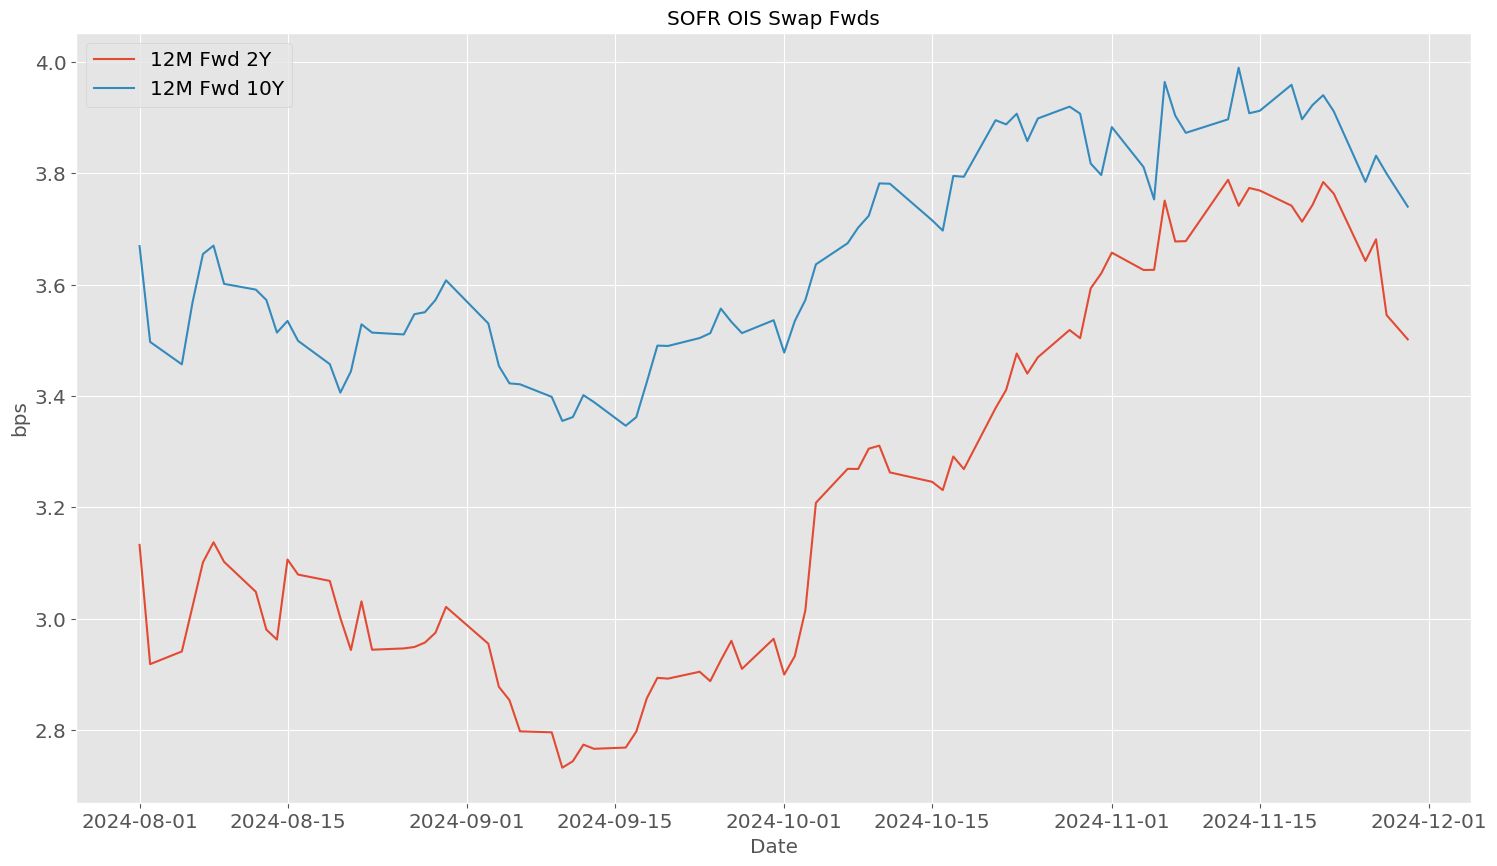

In [66]:
fwd_tenors = ["12M Fwd 2Y", "12M Fwd 10Y"]

dates = []
fwds: Dict[str, List[float]] = {}
for bdate in pd.date_range(start=start_date, end=end_date, freq=CustomBusinessDay(calendar=USFederalHolidayCalendar())):
    try:
        for fwd_tenor in fwd_tenors:
            if fwd_tenor not in fwds:
                fwds[fwd_tenor] = []
            groups = fwd_tenor.split(" ")
            option_tenor = " ".join(groups[:2])
            swap_tenor = " ".join(groups[2:])
            fwds[fwd_tenor].append(fwd_dict[bdate.to_pydatetime()].loc[fwd_dict[bdate.to_pydatetime()]["Tenor"] == swap_tenor, option_tenor].values[0])
        dates.append(bdate.to_pydatetime())
    except Exception as e:
        print(f"{bdate} not in db", e)

for fwd_tenor, fwd_rates in fwds.items():
    plt.plot(
        dates,
        fwd_rates,
        label=fwd_tenor,
    )

plt.xlabel("Date")
plt.ylabel("bps")
plt.title("SOFR OIS Swap Fwds")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

,Tenor,Fixed Rate,1D Fwd,1W Fwd,1M Fwd,2M Fwd,3M Fwd,6M Fwd,12M Fwd,18M Fwd,2Y Fwd,3Y Fwd,5Y Fwd,10Y Fwd,15Y Fwd
0,1D,4.580000,4.898612,4.900000,4.498208,4.401742,4.418192,4.330388,4.189981,4.066827,4.060766,4.040811,4.081878,4.479819,5.048188
1,1W,4.609523,4.897918,4.900000,4.279711,4.354739,4.384770,4.304022,4.171069,4.052320,4.049581,4.032604,4.076483,4.477015,5.045837
2,2W,4.596349,4.897918,4.900000,4.172360,4.299123,4.346323,4.265565,4.145392,4.036863,4.036231,4.022815,4.070345,4.473811,5.042852
3,3W,4.583212,4.897918,4.124098,4.075948,4.243513,4.307879,4.225915,4.119723,4.021314,4.022883,4.013029,4.064208,4.470608,5.039867
4,1M,4.565755,3.088897,3.844523,4.289239,4.359194,4.390482,4.237790,4.115563,4.021726,4.020934,4.010671,4.063122,4.471531,5.039297
5,2M,4.531655,4.408985,4.410679,4.417466,4.425401,4.255514,4.181314,4.061062,3.992937,3.992436,3.988745,4.049578,4.464945,5.033361
6,3M,4.497809,4.409549,4.410679,4.416617,4.153873,4.190942,4.095717,3.989546,3.953909,3.955659,3.960978,4.032473,4.456544,5.024560
7,4M,4.471935,4.409549,4.235741,3.902496,4.072695,4.051487,4.016088,3.926418,3.919107,3.922554,3.935958,4.017034,4.449228,5.017352
8,5M,4.446210,3.797155,4.010669,4.233630,4.110289,4.062602,4.018129,3.902417,3.910901,3.909448,3.924541,4.010659,4.448090,5.014775
9,6M,4.420633,4.292074,4.187178,3.983413,3.963814,3.960523,3.964701,3.850115,3.884535,3.882087,3.903492,3.997579,4.442153,5.008295


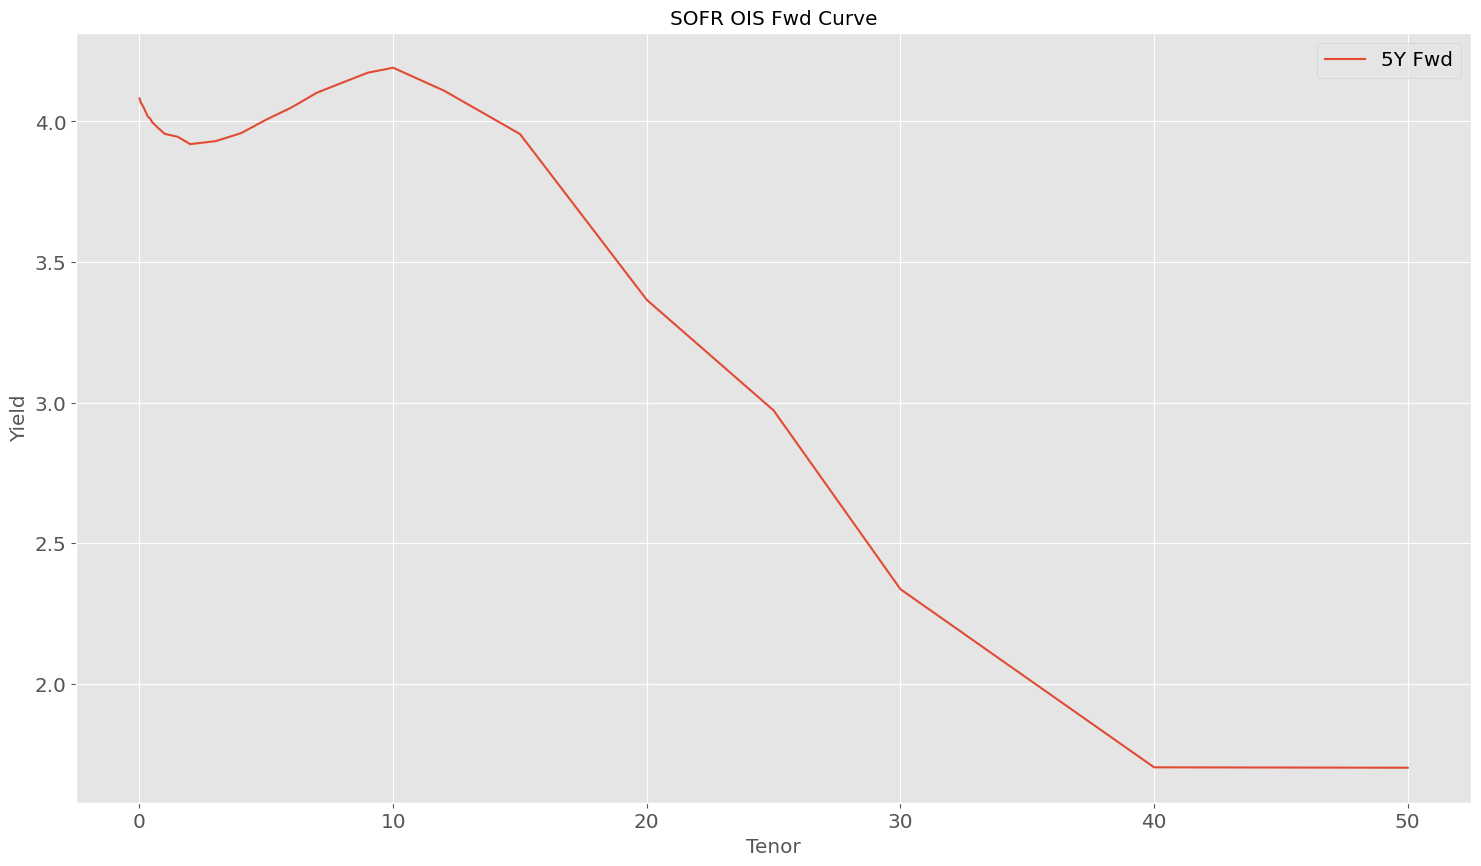

In [67]:
fwd_tenor = "5Y Fwd"
fwd_curve_date = datetime(2024, 11, 26)
display(fwd_dict[fwd_curve_date])

plt.plot(
    [tenor_to_years(tenor) for tenor in fwd_dict[fwd_curve_date]["Tenor"].to_list()],
    fwd_dict[fwd_curve_date][fwd_tenor],
    label=fwd_tenor,

)

plt.xlabel("Tenor")
plt.ylabel("Yield")
plt.title("SOFR OIS Fwd Curve")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()